In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os



dataset_path = '/content/drive/My Drive/Dataset'
split_output_path_skincondition = '/content/drive/My Drive/Dataset/SplitSkinCondition7'
split_output_path_skintype = '/content/drive/My Drive/dataset_processed/SplitSkinType'

# Membuat folder untuk dataset Skin Condition dan Skin Type jika belum ada
# os.makedirs(f'{dataset_path}/SplitSkinCondition', exist_ok=True)
# os.makedirs(f'{dataset_path}/SplitSkinType', exist_ok=True)


In [ ]:
# # Pindah ke direktori Google Drive tempat Anda ingin menyimpan dataset
# %cd '/content/drive/My Drive/Dataset'

# # Kloning repositori GitHub
# !git clone https://github.com/SkinPal/ML-Model-Development.git


In [ ]:
!ls '/content/drive/My Drive/Dataset'


'Skin Condition'	    skin_condition_opencv   SplitSkinCondition3   SplitSkinConditionFMtcnn
 skin_condition_fastmtcnn  'Skin Type'		    SplitSkinCondition7   SplitSkinConditionOpenCV


In [ ]:

import shutil
from sklearn.model_selection import train_test_split

def split_dataset(input_dir, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Membagi dataset menjadi train, val, dan test berdasarkan rasio yang diberikan."""
    classes = os.listdir(input_dir)

    for cls in classes:
        class_dir = os.path.join(input_dir, cls)
        files = os.listdir(class_dir)
        if len(files) == 0:
            print(f"Warning: Class '{cls}' has no files.")
            continue

        # Split files into train, val, and test
        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

        for folder, file_list in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
            dest_dir = os.path.join(output_dir, folder, cls)
            os.makedirs(dest_dir, exist_ok=True)
            for file in file_list:
                shutil.copy(os.path.join(class_dir, file), dest_dir)



In [ ]:
# # Membagi dataset untuk Skin Type dan Skin Condition
# split_dataset(f'{dataset_path}/Skin Type', split_output_path_skintype)
# split_dataset(f'{dataset_path}/skin_condition_fastmtcnn', split_output_path_skincondition)


In [ ]:
# Verifikasi hasil split di Google Drive
!ls '/content/drive/My Drive/Dataset/SplitSkinCondition7/train'
# !ls '/content/drive/My Drive/Dataset/SplitSkinType/train'


acne  normal  redness  Wrinkles


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ukuran batch dan ukuran gambar
batch_size = 64
img_height = 224
img_width = 224

# Membuat ImageDataGenerator untuk augmentasi citra
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi citra [0, 255] menjadi [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


# Untuk dataset validasi, kita hanya perlu normalisasi tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)

# Untuk dataset pengujian, kita hanya perlu normalisasi tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk dataset pelatihan
train_generator_type = train_datagen.flow_from_directory(
    f'{split_output_path_skintype}/train',  # Direktori untuk data pelatihan
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Menggunakan kategori untuk multi-class classification
)

train_generator_condition = train_datagen.flow_from_directory(
    f'{split_output_path_skincondition}/train',  # Direktori untuk data pelatihan
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Menggunakan kategori untuk multi-class classification
)



# Generator untuk dataset validasi
val_generator_type = val_datagen.flow_from_directory(
    f'{split_output_path_skintype}/val',  # Direktori untuk data validasi
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator_condition = val_datagen.flow_from_directory(
    f'{split_output_path_skincondition}/val',  # Direktori untuk data validasi
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk dataset pengujian
test_generator__type = test_datagen.flow_from_directory(
    f'{split_output_path_skintype}/test',  # Direktori untuk data pengujian
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator_condition = test_datagen.flow_from_directory(
    f'{split_output_path_skincondition}/test',  # Direktori untuk data pengujian
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 294 images belonging to 3 classes.
Found 1005 images belonging to 4 classes.
Found 37 images belonging to 3 classes.
Found 126 images belonging to 4 classes.
Found 38 images belonging to 3 classes.
Found 126 images belonging to 4 classes.


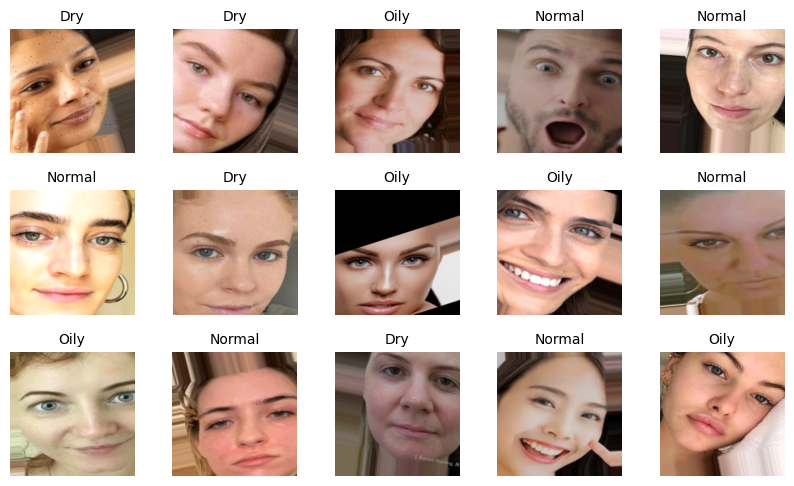

In [ ]:
iterator = iter(train_generator_type)

# Ambil batch pertama dari iterator
images, titles = next(iterator)

# Plotkan 15 gambar pertama dan judulnya
plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Mengatur jarak antar gambar
    plt.imshow((images[i] * 255).astype("uint8"))

    # Mengambil nama kelas berdasarkan indeks
    class_idx = np.argmax(titles[i])  # Indeks kelas dari one-hot encoding
    class_name = train_generator_type.class_indices  # Mengambil indeks kelas
    plt.title(list(class_name.keys())[class_idx], fontsize=10)

    plt.axis("off")

plt.show()

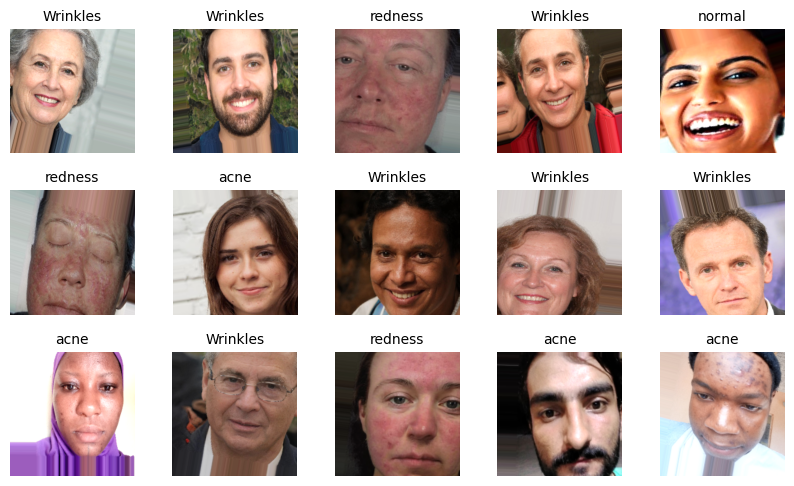

In [ ]:
iterator = iter(train_generator_condition)

# Ambil batch pertama dari iterator
images, titles = next(iterator)

# Plotkan 15 gambar pertama dan judulnya
plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Mengatur jarak antar gambar
    plt.imshow((images[i] * 255).astype("uint8"))

    # Mengambil nama kelas berdasarkan indeks
    class_idx = np.argmax(titles[i])  # Indeks kelas dari one-hot encoding
    class_name = train_generator_condition.class_indices  # Mengambil indeks kelas
    plt.title(list(class_name.keys())[class_idx], fontsize=10)

    plt.axis("off")

plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(img_width, img_height, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:



model_type = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
optimizer_type = tf.keras.optimizers.Adam(learning_rate=0.001)
model_type.compile(optimizer=optimizer_type, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
class StopTrainingAt95Accuracy(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.95, val_accuracy_threshold=0.95):
        super(StopTrainingAt95Accuracy, self).__init__()
        self.accuracy_threshold = accuracy_threshold
        self.val_accuracy_threshold = val_accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        # Mengambil nilai accuracy dan val_accuracy dari logs
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        # Jika keduanya melebihi 95%, hentikan pelatihan
        if acc >= self.accuracy_threshold and val_acc >= self.val_accuracy_threshold:
            print(f"\nEpoch {epoch + 1}: Accuracy and val_accuracy reached {self.accuracy_threshold * 100}%. Stopping training.")
            self.model.stop_training = True

In [ ]:
stopFit = StopTrainingAt95Accuracy(accuracy_threshold=0.95, val_accuracy_threshold=0.94)

In [ ]:
history_type = model_type.fit(
    train_generator_type,
    validation_data=val_generator_type,
    epochs=100,
    batch_size=batch_size,
    callbacks=[stopFit]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3452 - loss: 1.3825 - val_accuracy: 0.3814 - val_loss: 1.1319
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3903 - loss: 1.1161 - val_accuracy: 0.5258 - val_loss: 0.9806
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.5588 - loss: 0.9694 - val_accuracy: 0.5773 - val_loss: 0.9304
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4951 - loss: 0.9723 - val_accuracy: 0.6082 - val_loss: 0.8873
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5375 - loss: 0.9232 - val_accuracy: 0.6804 - val_loss: 0.8547
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5699 - loss: 0.8927 - val_accuracy: 0.6392 - val_loss: 0.8462
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5739 - loss: 0.8867 - val_accuracy: 0.6392 - val_loss: 0.7932
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6624 - loss: 0.7947 - val_accuracy: 0.6495 - val_loss: 0.8

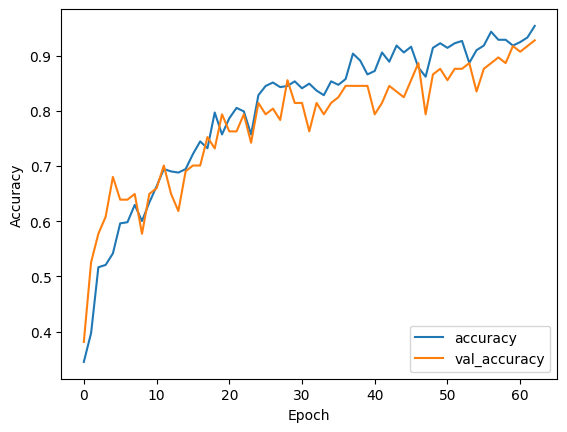

In [ ]:
plt.plot(history_type.history['accuracy'], label='accuracy')
plt.plot(history_type.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:

model_condition = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])


In [ ]:
optimizer_condition = tf.keras.optimizers.Adam(learning_rate=0.01)

model_condition.compile(optimizer= optimizer_condition, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_condition = model_condition.fit(
    train_generator_condition,
    validation_data=val_generator_condition,
    epochs=100,
    batch_size=batch_size,
    callbacks=[stopFit]
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8987 - loss: 0.2860 - val_accuracy: 0.9286 - val_loss: 0.2106
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9330 - loss: 0.1653 - val_accuracy: 0.9127 - val_loss: 0.2169
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.9455 - loss: 0.1681 - val_accuracy: 0.9127 - val_loss: 0.2363
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9518 - loss: 0.1305 - val_accuracy: 0.9127 - val_loss: 0.2545
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.9447 - loss: 0.1635 - val_accuracy: 0.9286 - val_loss: 0.2748
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9413 - loss: 0.1558 - val_accuracy: 0.9206 - val_loss: 0.2220
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9380 - loss: 0.1481 - val_accuracy: 0.9286 - val_loss: 0.2865
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.9435 - loss: 0.1302 - val_accuracy: 0.9206 -

In [ ]:

# # Menyimpan model Skin Type
# model_type.save('model_type.h5')
# from google.colab import files
# files.download('model_type.h5')


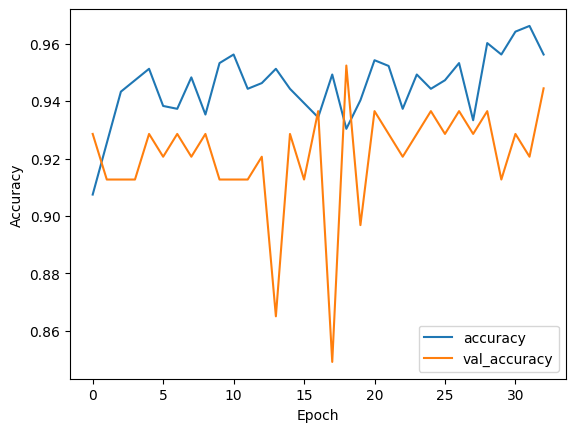

In [ ]:
plt.plot(history_condition.history['accuracy'], label='accuracy')
plt.plot(history_condition.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# test_loss_type, test_acc_type = model_type.evaluate(test_generator__type)
# print(f"Akurasi model Skin Type: {test_acc_type:.2f}")
# print(f"Loss model Skin Type: {test_loss_type:.2f}")

test_loss_condition, test_acc_condition = model_condition.evaluate(test_generator_condition)
print(f"Akurasi model Skin Condition: {test_acc_condition:.2f}")
print(f"Loss model Skin Condition: {test_loss_condition:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9158 - loss: 0.3310
Akurasi model Skin Condition: 0.92
Loss model Skin Condition: 0.33


In [ ]:
model_condition.save("model_condition3.h5")
model_condition.save("model_condition3.keras")

In [ ]:
from google.colab import files
files.download('model_condition3.h5')
files.download('model_condition3.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from io import BytesIO
from PIL import Image

# Misalnya model sudah dilatih sebelumnya dan disimpan dalam variabel model
# model_skintype = tf.keras.models.load_model('path_to_skintype_model')
# model_skincondition = tf.keras.models.load_model('path_to_skincondition_model')

# Buat widget uploader untuk memilih gambar
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)

# Output widget untuk menampilkan hasil
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ Fungsi untuk membuat prediksi dan mencetak output untuk skintype dan skincondition."""
    # Membaca gambar dari file (dalam bentuk BytesIO)
    image = Image.open(file)
    image = image.resize((224, 224))  # Ukuran gambar sesuai dengan input model (224x224)
    image = np.array(image)

    # Jika gambar hanya memiliki satu channel (grayscale), ubah menjadi RGB
    if image.ndim == 2:  # Jika gambar grayscale
        image = np.stack((image,)*3, axis=-1)

    # Mengubah gambar menjadi format yang diterima oleh model
    image = np.expand_dims(image, axis=0)  # Menambahkan dimensi batch

    # Normalisasi citra (jika model memerlukan normalisasi)
    image = image / 255.0

    # Prediksi untuk Skintype
    prediction_skincondition = model_condition.predict(image, verbose=0)[0]

    # Prediksi untuk Skincondition
    # prediction_skincondition = model_condition.predict(image, verbose=0)[0]

    # Tampilkan hasil
    with out:
        print(f'\nModel output untuk {filename}:\n')

        # Skintype
        # prediction_index_skintype = np.argmax(prediction_skintype)
        # classes_skintype = ["Dry",  "Normal",  "Oily"]  # Gantilah sesuai kelas skintype
        # predicted_class_skintype = classes_skintype[prediction_index_skintype]
        # print(f'Skintype: {predicted_class_skintype} (Probabilitas: {prediction_skintype[prediction_index_skintype]:.4f})')
        # print("\nProbabilitas untuk setiap skin condition:")
        # # for i, prob in enumerate(prediction_skincondition):
        # #     print(f'{classes_skincondition[i]}: {prob:.4f}')

        # Skincondition
        classes_skincondition = ["acne",  "normal", "redness", "Wrinkles"]  # Gantilah sesuai kelas skincondition

        # Menampilkan probabilitas untuk setiap skin condition
        print("\nProbabilitas untuk setiap skin condition:")
        for i, prob in enumerate(prediction_skincondition):
            print(f'{classes_skincondition[i]}: {prob:.4f}')

        # Kelas dengan probabilitas tertinggi
        prediction_index_skincondition = np.argmax(prediction_skincondition)
        predicted_class_skincondition = classes_skincondition[prediction_index_skincondition]
        print(f'\nPrediksi utama untuk skin condition: {predicted_class_skincondition} (Probabilitas: {prediction_skincondition[prediction_index_skincondition]:.4f})')

def on_upload_change(change):
    """ Fungsi untuk mengambil file yang diunggah dan menjalankan prediksi."""
    items = change.new
    for item in items:  # Loop jika lebih dari satu file diunggah
        print(f"File {item} telah diunggah.")  # Hanya nama file yang diakses langsung
        file_jpgdata = BytesIO(items[item]['content'])  # Mengonversi file menjadi BytesIO
        file_predict(item, file_jpgdata, out)

# Menyambungkan fungsi ke event perubahan upload
uploader.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

File muka alpat.jpg telah diunggah.
File muka mbabetrik.jpg telah diunggah.
File muka inge2.jpg telah diunggah.
File muka fazel.jpg telah diunggah.
File muka mila2.jpg telah diunggah.
File muka inge.jpg telah diunggah.
File muka aku.jpg telah diunggah.
File muka ferdy.jpg telah diunggah.
